In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.modeling import models, fitting
from astropy import modeling
import numpy as np

Make some fake data that looks sort-of like the original data (I'm not very good at functional modeling so this was the best I could do):

In [2]:
orig_wavelength = np.linspace(5680, 5820, 100)
# Just eyeballing these values
orig_model = (
    models.RickerWavelet1D(x_0=5740, sigma=25, amplitude=-25) +
    models.Const1D(110) -
    models.Gaussian1D(mean=5700, amplitude=20, stddev=10)
)
orig_flux = orig_model(orig_wavelength) + np.random.normal(size=100)

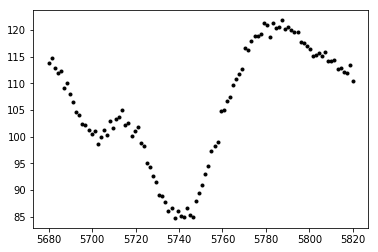

In [3]:
plt.plot(orig_wavelength, orig_flux, '.k')

Your code to try to fit a Gaussian to this data.  Like you, I get a flat line:

In [4]:
g_init = models.Gaussian1D(amplitude=1., mean=5000, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, orig_wavelength, orig_flux)

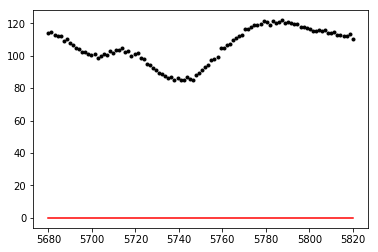

In [5]:
plt.plot(orig_wavelength, orig_flux, '.k')
plt.plot(orig_wavelength, g(orig_wavelength), 'r-')

Let's try giving the fitted model some better initial parameters my using Numpy to "eyeball" the original data:

mean: 5737.979797979798, stddev: 42.768052162734605, amplitude: 84.73925092448636


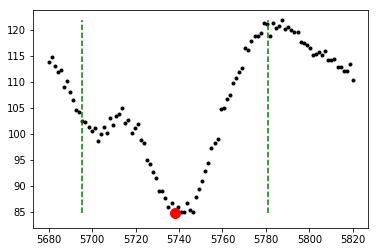

In [6]:
an_amplitude = orig_flux.min()
an_mean = orig_wavelength[orig_flux.argmin()]
an_stddev = np.sqrt(np.sum((orig_wavelength - an_mean)**2) / (len(orig_wavelength) - 1))
print(f'mean: {an_mean}, stddev: {an_stddev}, amplitude: {an_amplitude}')
plt.plot(orig_wavelength, orig_flux, '.k', zorder=1)
plt.scatter(an_mean, an_amplitude, color='red', s=100, zorder=2)
plt.vlines([an_mean - an_stddev, an_mean + an_stddev], orig_flux.min(), orig_flux.max(),
           linestyles='dashed', colors='gg', zorder=2)

In [7]:
# Note that we are modeling an inverted Gaussian with a displacement from about 110
# flux counts, so let's account for that a well in the model (or we could just displace
# the original data as well).
an_disp = orig_flux.max()
g_init2 = (
    models.Const1D(an_disp) +
    models.Gaussian1D(amplitude=(an_amplitude - an_disp), mean=an_mean, stddev=an_stddev)
)
fit_g2 = fitting.LevMarLSQFitter()
g2 = fit_g2(g_init2, orig_wavelength, orig_flux)

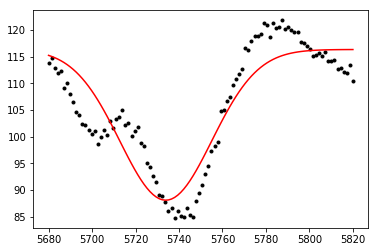

In [8]:
plt.plot(orig_wavelength, orig_flux, '.k')
plt.plot(orig_wavelength, g2(orig_wavelength), 'r-')

Not perfect, but certainly much better; you could easily improve on this with better knowledge of the model.